# Mergeing the POU libraries

## Importing libraries

In [1]:
import seaborn as sns
sns.set_palette('colorblind')

import matplotlib.pyplot as plt
import numpy as np

from DMS_designer import Library

## Defining library and plotting variables

In [2]:
mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'

sheet_name = 'Original_Data'

aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

# colorscheme = 'RdBu'
# WT_color = 'xkcd:violet'

sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
# to_red = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)
mutability_cmap= sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'][::-1],as_cmap=True)

In [3]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)

## Importing library 1
The replicate replicate corespondence for library one looks quite good. 
We also print a heatmap of library one normalized variant effect scores and position mutability.

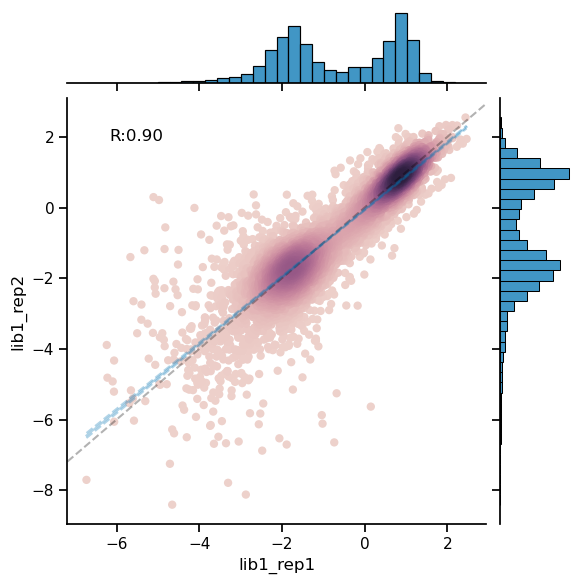

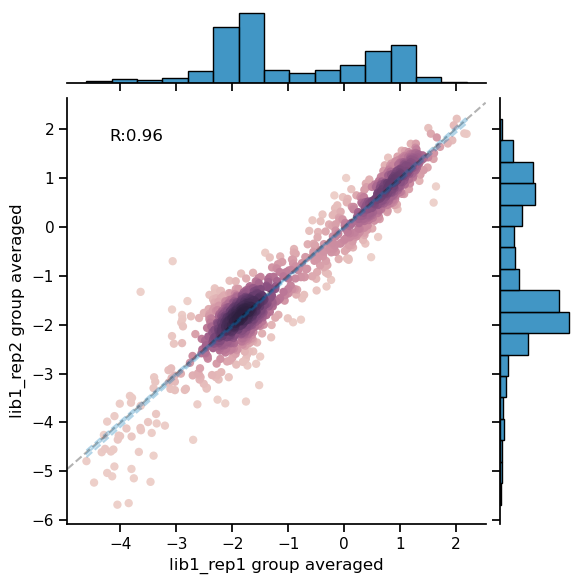

In [4]:
replicates = {'lib1_rep1':['P0_R1','P10_R1'],
              'lib1_rep2':['P0_R2','P10_R2']}
wt_aa = 'DEPSDLEELEKFAKTFKQRRIKLGFTQGDVGLAMGKLYGNDFSQTTISRFEALNL'
id_cols = ['id']
process_call = 'id'
data_file = './library_count_data/POU2F3_1.xlsx'

lib1 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)


lib1.make_replicate_checks()
plt.show()

plot_features = False
plot_mutability = True
plot_properties = False


heatmap_fig, axd = lib1.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5, main_cmap=sunset_cmap, mutability_cmap=mutability_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()




## Importing library 2
The replicate replicate corespondence for library two is quite high, but there are differences in scale of effects
which we adjust with a linear correction. 
We also print a heatmap of library two normalized variant effect scores and position mutability.

Library 2 before replicate rescaling


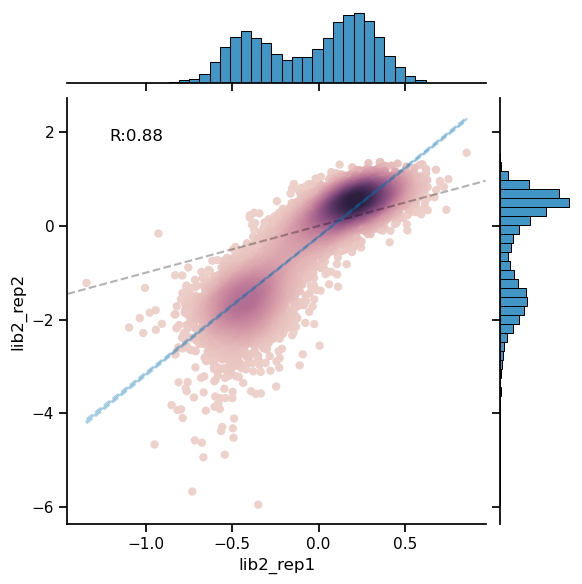

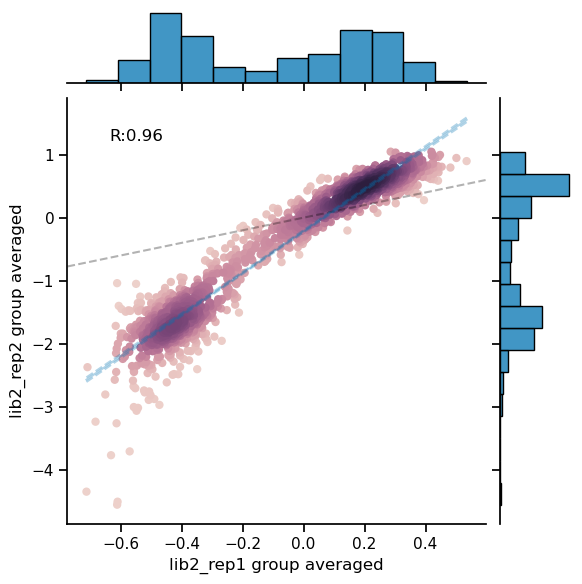

Library 2 after replicate rescaling


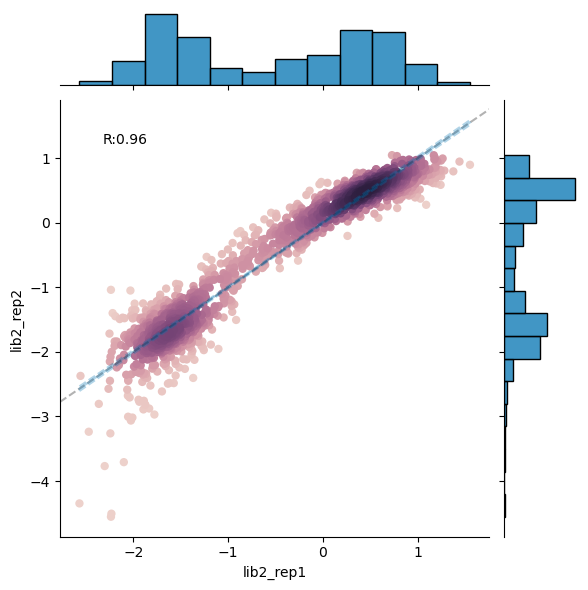

In [5]:
replicates = {'lib2_rep1':['P0_Rep1','P10_Rep1'],
              'lib2_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'EALNLSFKNMCKLKPLLEKWLNDAESSPSDPSVSTPSSYPSLSEVFGRKRKKRTSIETNIRLTLEKRFQD'
id_cols = ['ID']
process_call = 'ID'
data_file = './library_count_data/POU2F3_2.xlsx'

lib2 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)
print("Library 2 before replicate rescaling")

lib2.make_replicate_checks()
plt.show()

print("Library 2 after replicate rescaling")
lib2, fig_pre, fig_post = lib2.rescale_by_replicate_group('lib2_rep2','lib2_rep1')
plt.close(fig_pre.fig)

plt.show(fig_post.fig)

plot_features = False
plot_mutability = True
plot_properties = False


heatmap_fig, axd = lib2.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5, main_cmap=sunset_cmap, mutability_cmap=mutability_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

## Importing library 3
The replicate replicate corespondence for library three looks quite good. 
We also print a heatmap of library three normalized variant effect scores and position mutability.

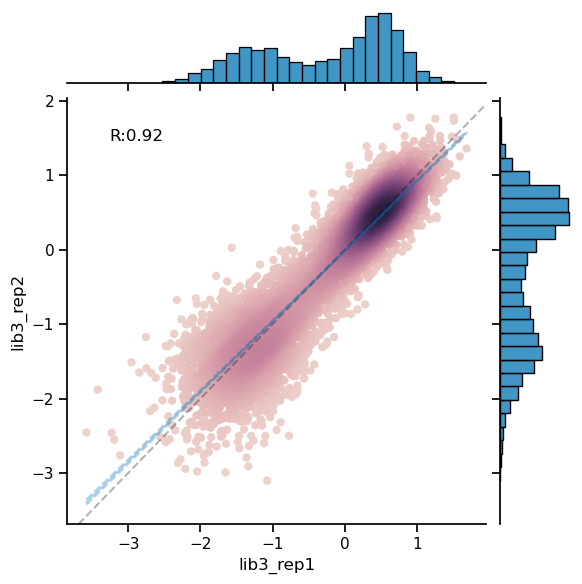

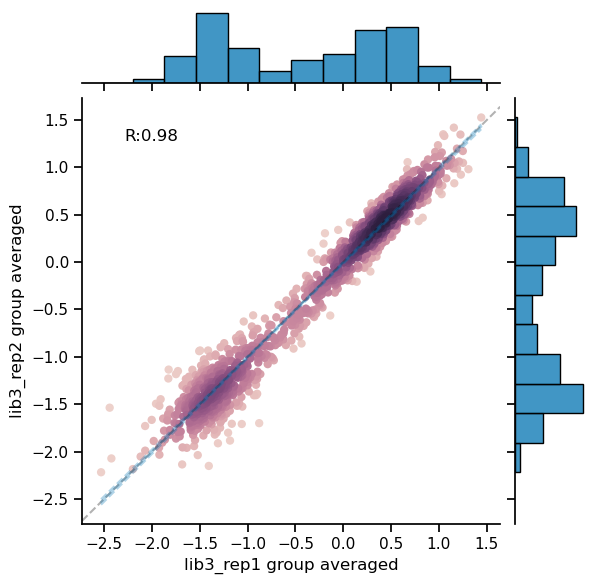

In [6]:
replicates = {'lib3_rep1':['P0_Rep1','P10_Rep1'],
              'lib3_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'RFQDNPKPSSEEISMIAEQLSMEKEVVRVWFCNRRQKEKRINCPVATPIKPPVYN'
id_cols = ['ID']
process_call = 'ID'
data_file = './library_count_data/POU2F3_3.xlsx'

lib3 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)


lib3.make_replicate_checks()
plt.show()

plot_features = False
plot_mutability = True
plot_properties = False


heatmap_fig, axd = lib3.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5, main_cmap=sunset_cmap, mutability_cmap=mutability_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()




## Merging library 1 into library 2
Since library 1 and library 2 share a small number of variants which are almost all in the bottom mode of the
fitness distribution, we cannot align library scores using all the overlapping variants.
Instead we correct the scores using the positive and negative controls.

/Users/jackdesmarais/miniconda3/envs/DMS_Designer/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/jackdesmarais/miniconda3/envs/DMS_Designer/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


'Library controls before merge'

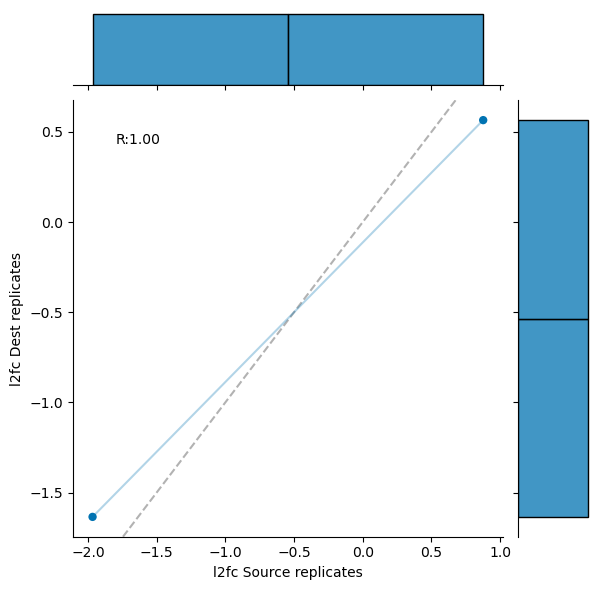

'Library controls after merge'

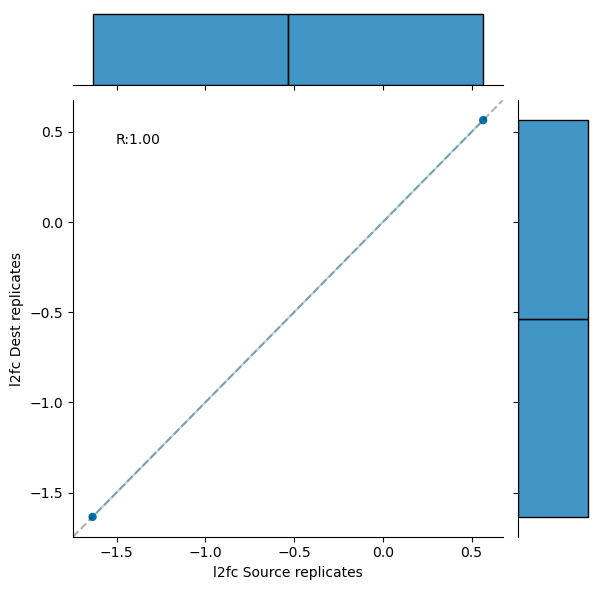

In [7]:
lib1.id_cols=['ID']
lib1.data_df = lib1.data_df.rename(columns={'id':'ID'},level=1)

lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib2,lib1,50,0, lib1.WT_seq+lib2.WT_seq[5:], control_col='AA',control_val=['WT','*'],automatically_rescale_by_controls=True)

display("Library controls before merge")
display(fig_pre.fig)
plt.close(fig_pre.fig)

display("Library controls after merge")  
display(fig_post.fig)
plt.close(fig_post.fig)


## Merging library 3 into library 2+1
Since library 3 and library 2 share a large number of variants which span the
fitness distribution, we can align library scores using all the overlapping variants.

'Library overlapping variants before merge'

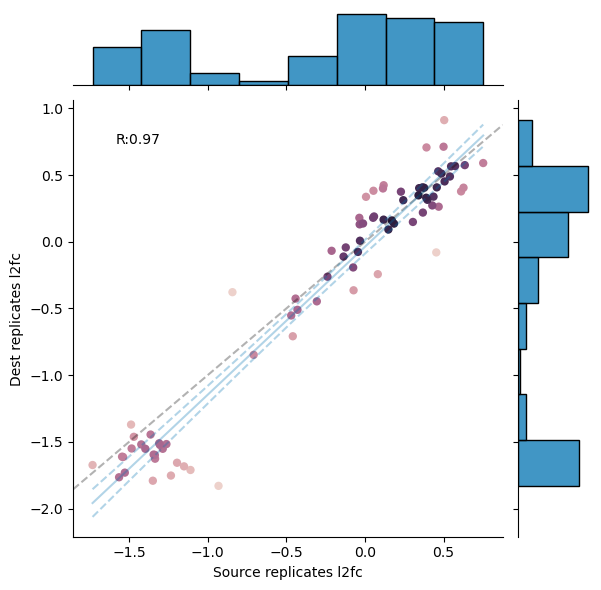

'Library overlapping variants after merge'

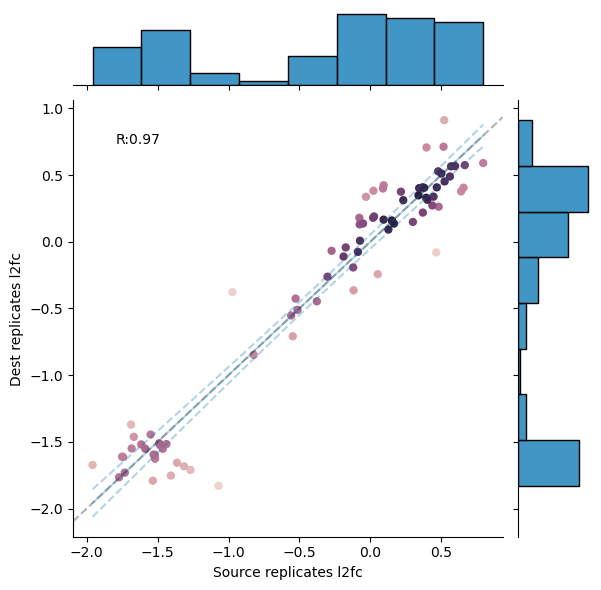

In [8]:
lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib_merged,lib3,0,116, lib_merged.WT_seq+lib3.WT_seq[4:],automatically_rescale_linearly=True)

display("Library overlapping variants before merge")
display(fig_pre.fig)
plt.close(fig_pre.fig)

display("Library overlapping variants after merge")  
display(fig_post.fig)
plt.close(fig_post.fig)

## Showing replicate replicate correspondence within and between replicates

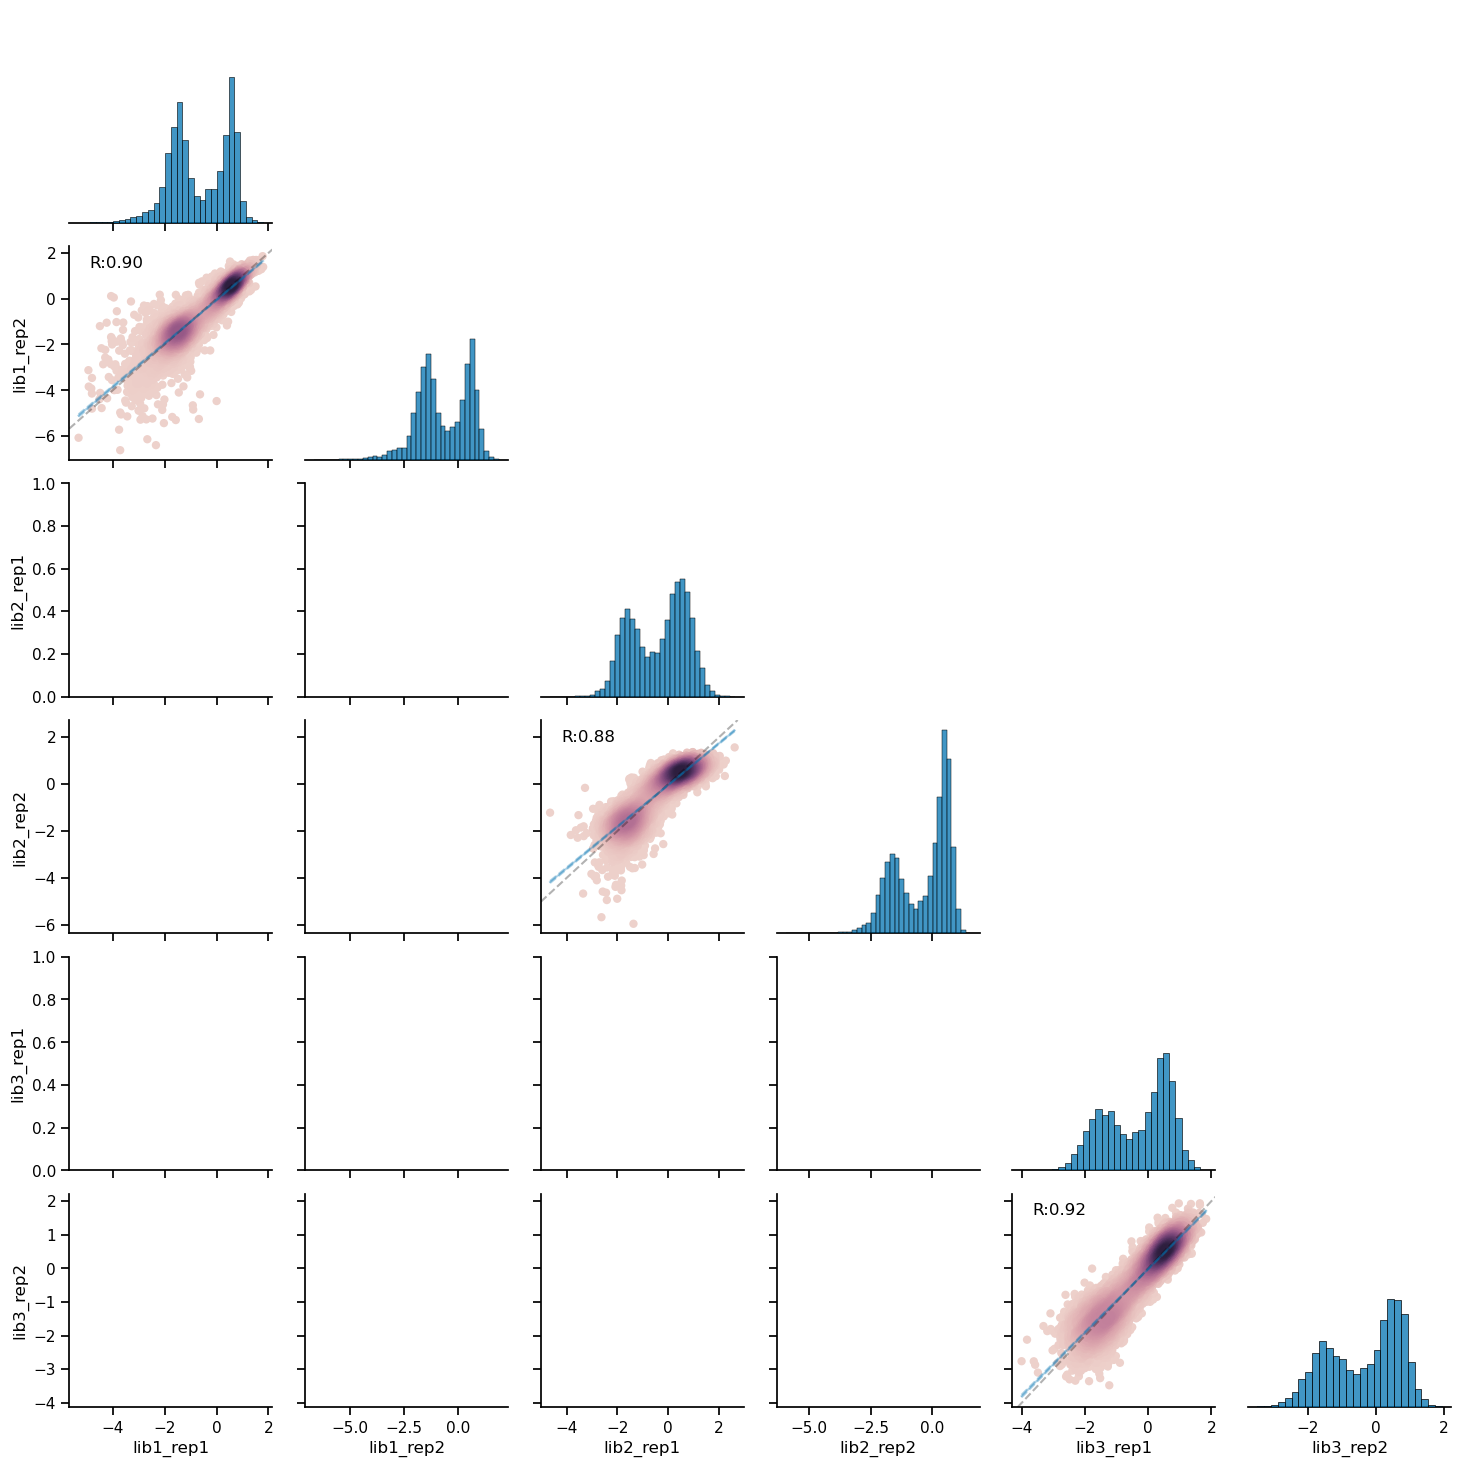

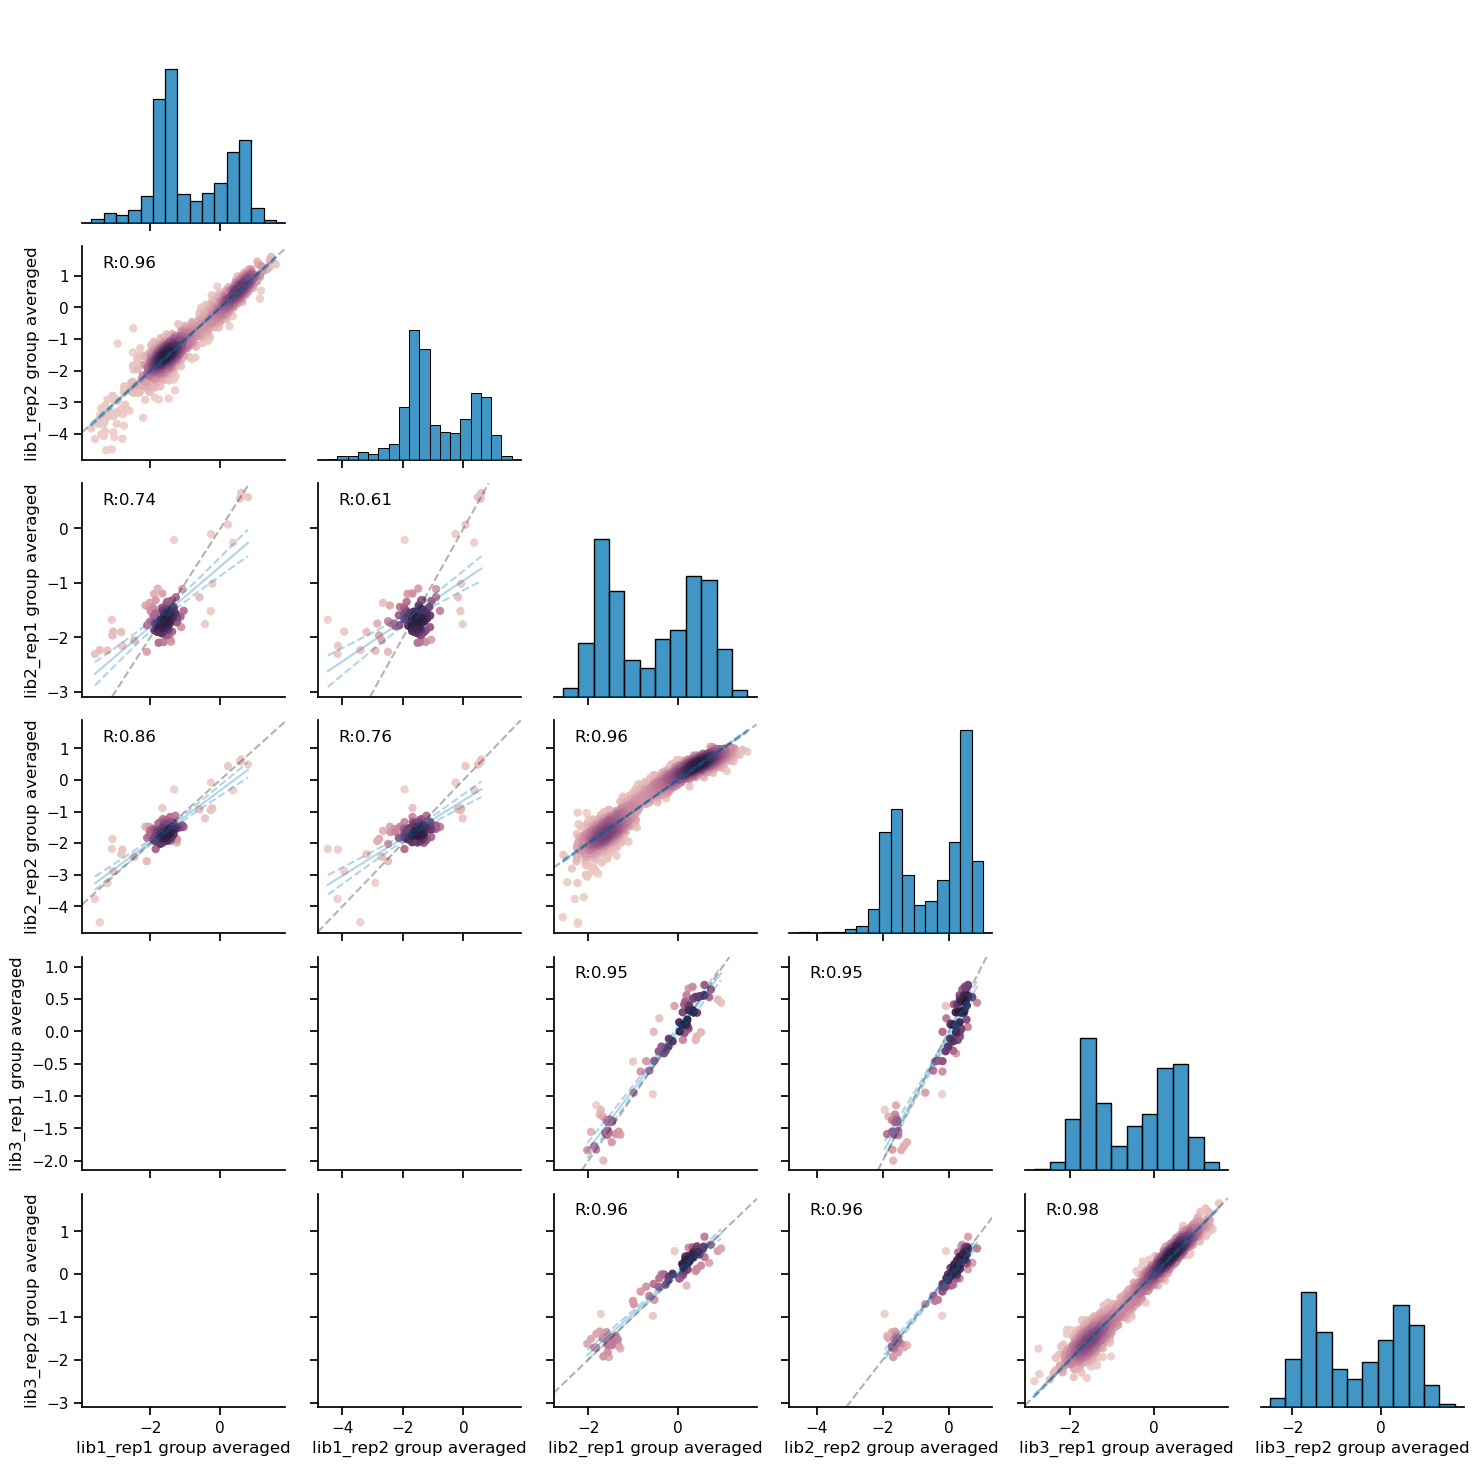

In [10]:
lib_merged.make_replicate_checks()
plt.show()

## Saving the merged library for further analysis

In [9]:
lib_merged.save('./output/libraries/POU2F3_merged.pkl')